# Fourier Representation of Functions

This notebook describes some fundamental concepts regarding representation of functions as Fourier series and Fourier integrals.

## Periodic Functions

Consider the following square wave which is periodic with period $T = \pi$

<center><img src="./img/sq_wave.png" alt="square wave" style="width:500px"></center>

with th following Fourier series representation:

$$F{S_{f(x)}} = 2 + \frac{8}{{\pi (2n - 1)}}\sum\limits_{n = 1}^\infty  {{S_{(2n - 1)x}}}. $$

Each term in the function corresponds to a harmonic of a given frequency and amplitude. Let us plot some of the fundamentals harmonics:

### Xxxxx Xxxxxxx

In [117]:
%matplotlib notebook
from __future__ import division
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy import init_printing
init_printing()
from IPython.display import Image

In [118]:
def harmonic(n , x , sn): 
    an = 8.0/(np.pi*(2*n-1))
    sn[:] = an*np.sin((2.0*n-1.0)*x[:])
    plt.figure(n)
    plt.plot(x , sn)
    
    return sn

In [119]:
x = np.arange(-5.0 , 5.0 , 0.05)
n = len(x)
sum = np.zeros(n)
sn  = np.zeros(n)

<IPython.core.display.Javascript object>


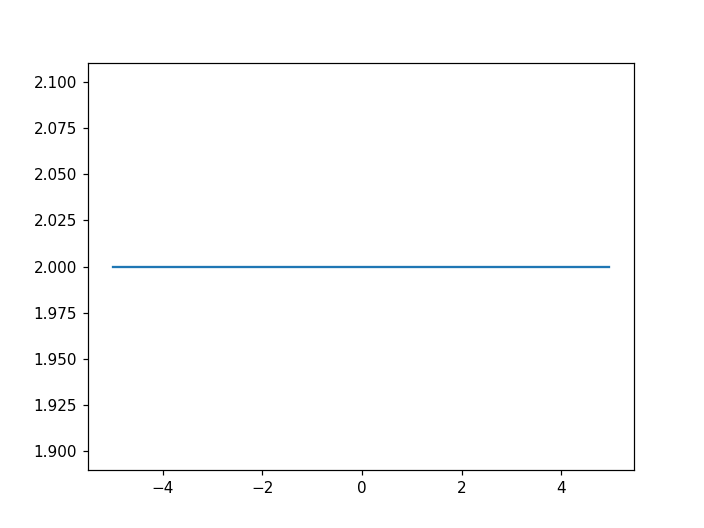

In [120]:
# S0
sum[:] = 2.0
plt.figure(0)
plt.plot(x , sum)

<IPython.core.display.Javascript object>


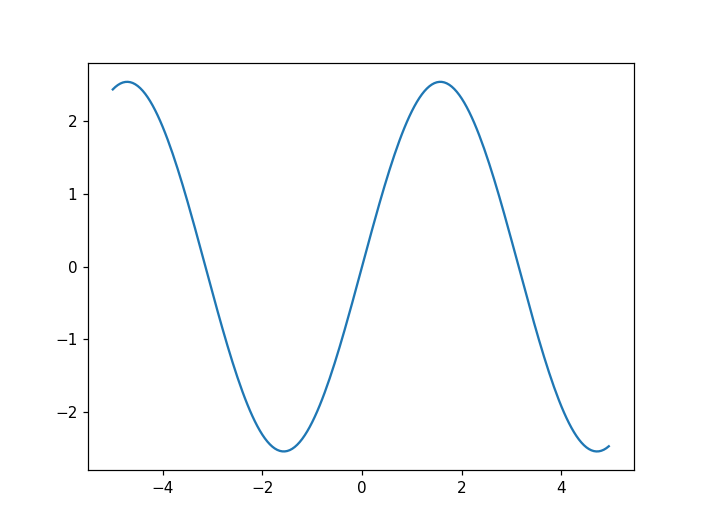

In [121]:
n=1
sn = harmonic(n , x , sn)
sum[:] = sum[:] + sn[:]
sn[:] = 0.0

<IPython.core.display.Javascript object>


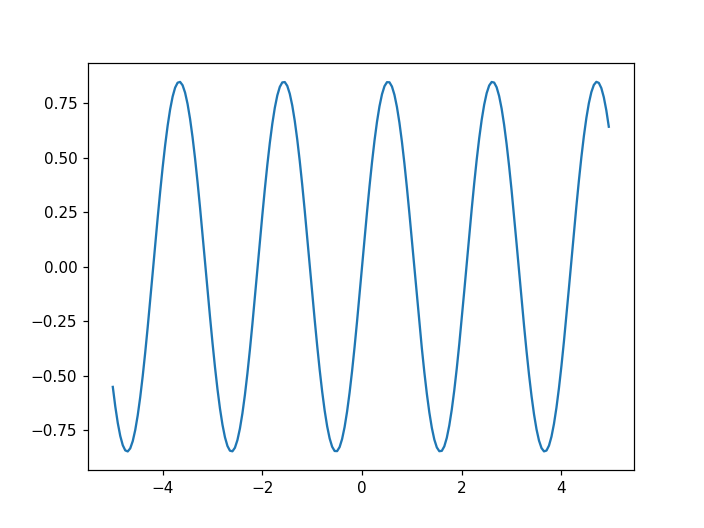

In [122]:
n=2
sn = harmonic(n , x , sn)
sum[:] = sum[:] + sn[:]
sn[:] = 0.0

<IPython.core.display.Javascript object>


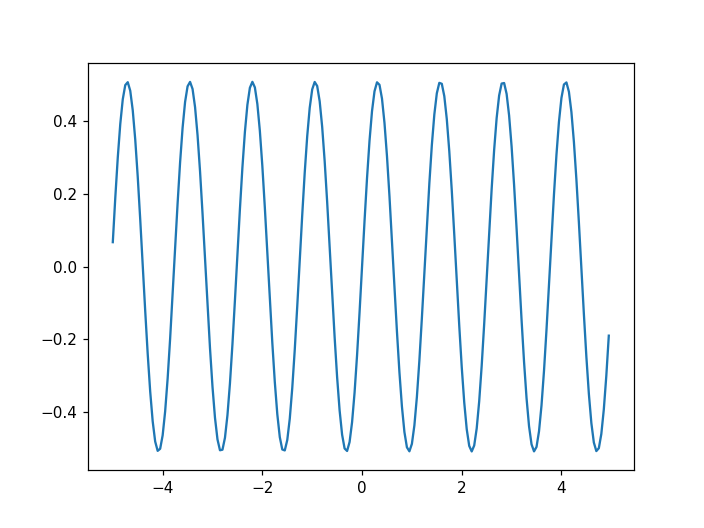

In [123]:
n=3
sn = harmonic(n , x , sn)
sum[:] = sum[:] + sn[:]
sn[:] = 0.0

<IPython.core.display.Javascript object>


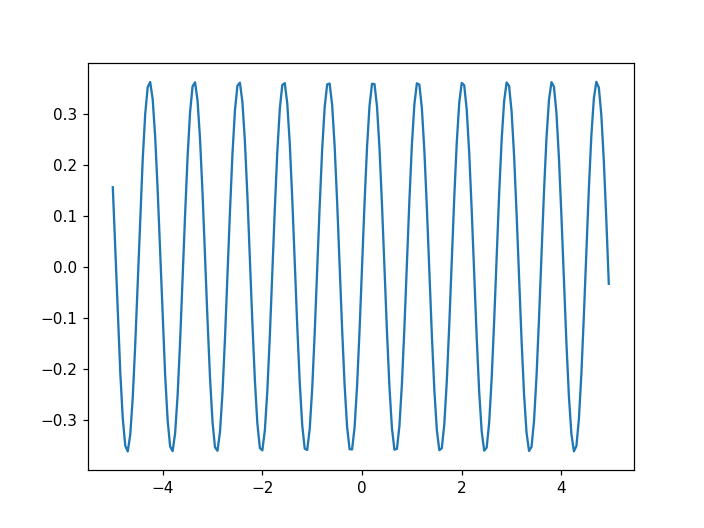

In [124]:
n=4
sn = harmonic(n , x , sn)
sum[:] = sum[:] + sn[:]
sn[:] = 0.0

Now let us plot the series including the terms considered so far:

<IPython.core.display.Javascript object>


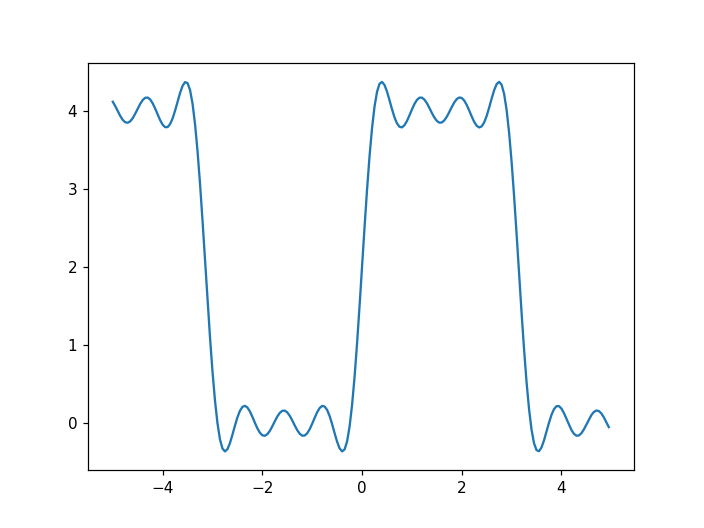

In [125]:
plt.figure(n+1)
plt.plot(x , sum)
plt.show()

## Non periodic functions

### The Ricker Wavelet

The Ricker wavelet is a time signal defined by simple paramters allowing to produce time series with a perfectly known spectra. The time signal is defined by the following function:

$$f(t) = \left[ {1 - 2{\pi ^2}f_c^2{{(t - {t_c})}^2}} \right]{e^{ - {\pi ^2}f_c^2{{(t - {t_c})}^2}}}$$

where $f_c$ is the dominant peak frequency of and $t_c$ defines the time location of the center peak. Th time width or breadth is given by $t_b$.

<center><img src="./img/pulso.png" alt="pulso.png" style="width:400px"></center>

### Fourier integral with the FFT()

Consider a time series of maximum frequnency $f_{max}$. From the sampling thorem it follows that the signal must be sampled at least at a rate $\delta = 1/2/ f_{max}$. Consider now a signal of total duration $T$ sampled by $N$ points as shown blow:

<center><img src="./img/esquema.png" alt="esquema.png" style="width:300px"></center>

The resulting effective sampling rate turns out to be:

$$\Delta t = \frac{T}{N}$$

allowing to effectivly describe frquencies up to:

$$f = \frac{1}{{2\Delta t}}$$

sampled at:

$$df = \frac{\Delta t}{{N}}$$

## Design of the Ricker pulse

The pulse itself has a duration (or breath) defined by its central frequency according to:

$${t_b} = \frac{{\sqrt 6 }}{{\pi {f_c}}}.$$

However for analysis purposes it is convenient to locate the pulse within a general signal of duration $T_t$ and to compute the pulse numerically we need to define the total number of time samples $N$ making sure that we keep at last the minimum required sampling rate. Consider the following set of parameters:

Breadth = 0.194924200308 s


<IPython.core.display.Javascript object>


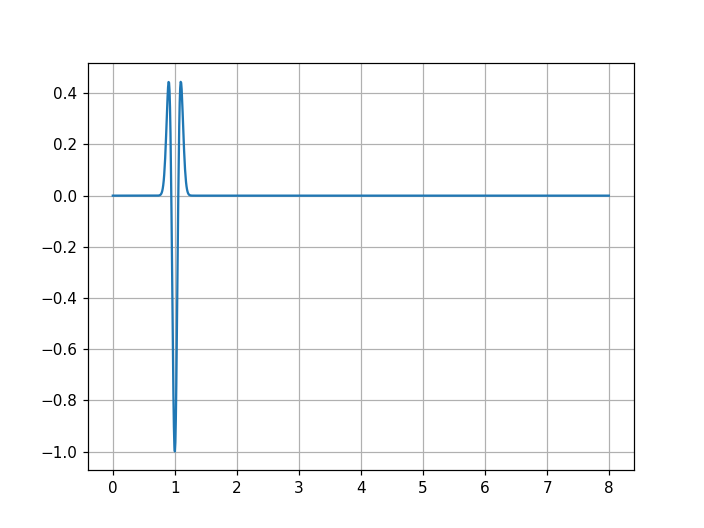

In [126]:
N = 1024
T_t = 8.0
tc = 1.0
fc = 4.0
t_b = np.sqrt(6)/np.pi/fc
print ("Breadth =") , t_b , ('s')
Rick , time = fou.ricker(N , T_t , tc, fc)
fou.grafsignalG(Rick , T_t/N , n+2)

Notice the amplitude spectra can be reproduced up to:

In [127]:
print ('Effctive maximum frquency =') , N/2.0/T_t
print ('Effective time step=') , T_t/N

Effctive maximum frquency = 64.0
Effective time step= 0.0078125


Now, conducting direct fourier transform of the above time signal we obtain the corresponding Fourier amplitude spectra spectra:

<IPython.core.display.Javascript object>


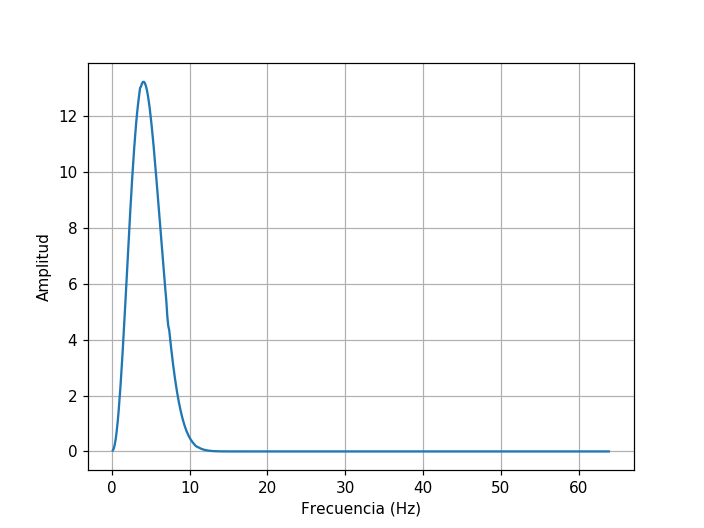

In [128]:
FS = 10.0
x , Samag , A , nfs = fou.Ftrans(Rick , N , T_t/N , FS)
fou.grafFourier(Samag , x , nfs , n+3)

We can also perform inverse Fourier transform to get the time signal once again as follows:

<IPython.core.display.Javascript object>


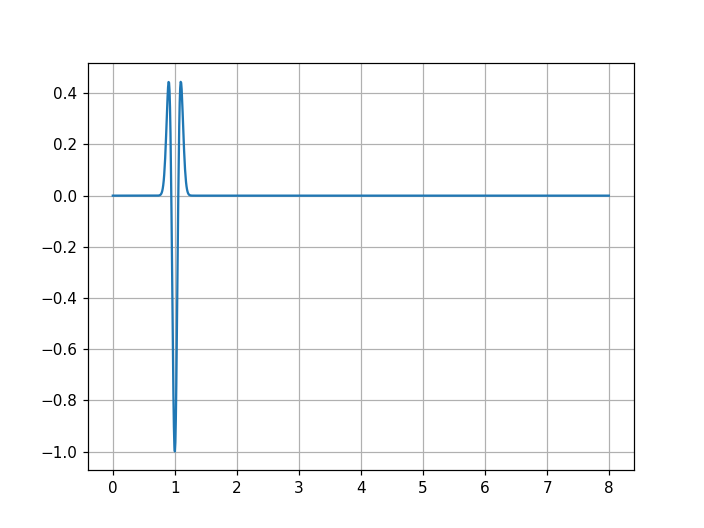

In [129]:
ZZ = np.fft.ifft(A)
ZZ = np.real(ZZ)
fou.grafsignalG(ZZ , T_t/N , n+4)

### Consider a second pulse

<IPython.core.display.Javascript object>


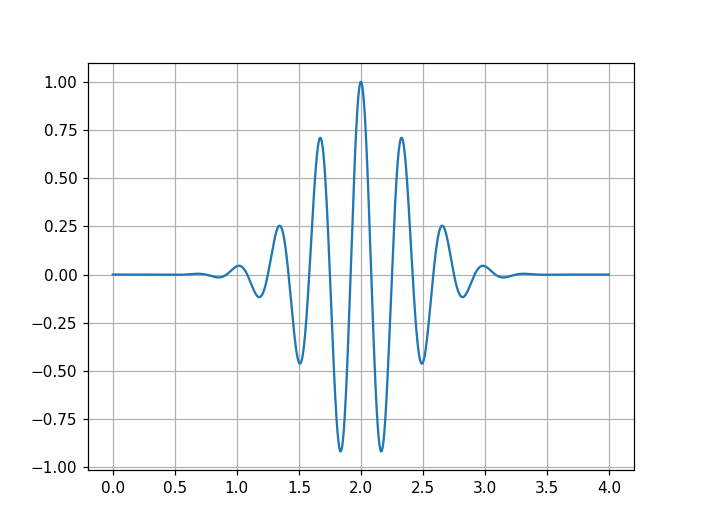

In [130]:
N   = 2048
T_t = 4.0
x = np.arange(-2.0 , 2.0 ,T_t/N)
n = len(x)
FX = np.zeros((n), dtype = complex)
xm = x 
pot = -np.pi*xm**2
FX = np.cos(6.0*np.pi*xm)*np.exp(pot)
fou.grafsignalG(FX , T_t/N , n+5)

Notice the amplitude spectra can be reproduced up to:

<IPython.core.display.Javascript object>


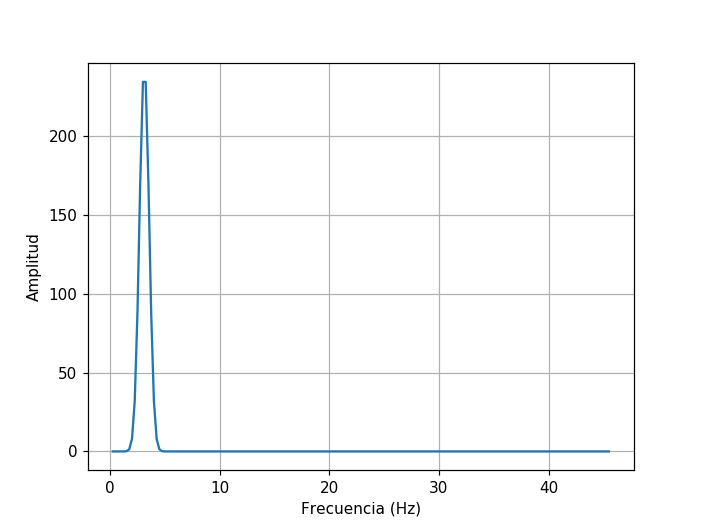

In [131]:
FS = 10.0
x , Samag , A , nfs = fou.Ftrans(FX , N , T_t/N , FS)
fou.grafFourier(Samag , x , nfs , n+6)

We can also perform inverse Fourier transform to get the time signal once again as follows:

<IPython.core.display.Javascript object>


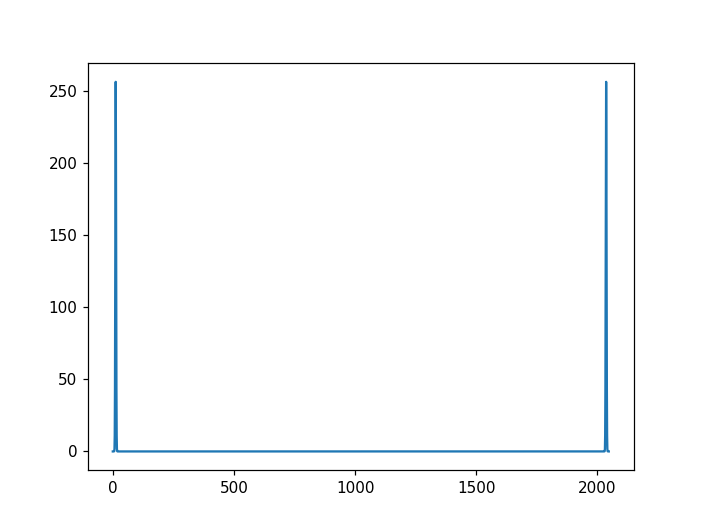

<IPython.core.display.Javascript object>


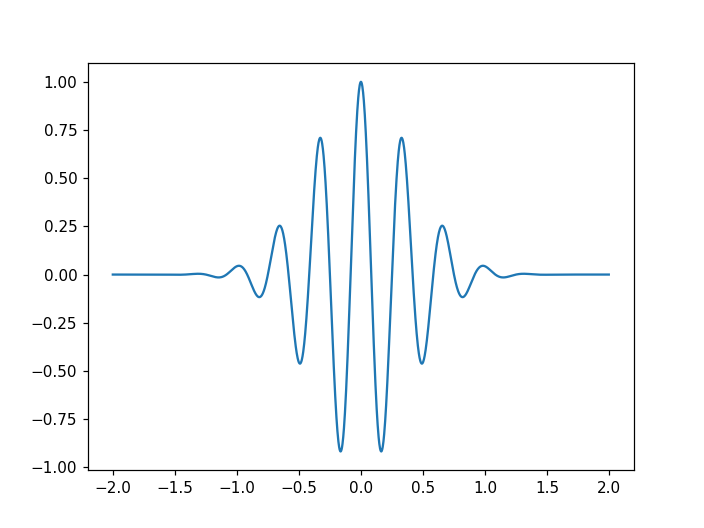

In [132]:
ZZ = np.fft.fft(FX)
XX = np.fft.ifft(ZZ)
#
# Let us plot the FAS
#
plt.figure(n+7)
plt.plot(abs(ZZ))
plt.show()
#
# And now again the original function
#
plt.figure(n+8)
plt.plot(xm , XX)
plt.show()

In [133]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()